<a href="https://colab.research.google.com/github/constructor-s/aps1080_winter_2021/blob/main/A2/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A2: Monte Carlo 

<!-- Lesson -->
<!-- ------ -->

### Recap

> Where are we so far in the course? We, in the introduction, mentioned that the RL problem is the problem of designing the intelligence that resides inside an agent (M) enabling it to control an environment (E). The agent is coupled to the environment via: (a) an actuation signal, A\_t, from M to E, and (b) state, S\_t, and reward, R\_T, feedback signals from E to M. The agent must control the environment by selection appropriate actions, A\_k, based on the feedback it receives, S\_t and R\_t. The agent selects its action via a _policy_. The policy may be deterministic or stochastic.
> 
> This is exactly a classical control theoretic formulation of controller and plant. What, then, is so special that we call this "reinforcement learning"? In contrast to classical control theory, we do not assume that we have a full model of E; hence, we must _learn_ something about the environment in order to control it.
> 
> With dynamic programming, we had perfect knowledge of the environment; i.e., we had access to p(s',r|s,a), the state transition dynamics of E. Using this, we posed the problem of prediction (or policy evaluation, Eval): given a policy pi, and an environment (specified by p), we can iteratively execute a process to obtain, in the limit as n (the number of iterations) goes to infinity, V\_pi (the state value function of the policy). The foundation of the iterative process was the recursive definition of return and the Bellman relationship. We could do the same of Q\_pi.
> 
> We then posed a strategy for policy improvement (Impr), where by if we have a policy pi\_k, and the associated value function V\_k, we could propose an improved policy such that in any state, s, we chose the action, a, such that the next state of E, s', would have maximum V\_pi\_k(s'). Alternatively, we could simply chose, if we had Q\_pi\_k, a=argmax\_a Q\_pi\_k(s, a).
> 
> Finally, proposed a strategy for control of this environment by an agent. The agent (a) starts with a policy, pi\_0, (b) executes Eval to obtain the value function, (c) executes Impr to give us pi\_1, the improved policy, (d) and continues to iterate, alternating Eval and Iter. Since, theoretically, Eval is a process that converges to the value function in the limit (n->\\Infty), we illustrated the pragmatic compromise of truncated Eval (Eval\_trunc) instead of full Eval, and commented that this will also converge to the optimal policy, pi\_\*.
> 
> We note here that for DynProg we could have presented a very straightforward analytical alternative that did not require any of the above; since E is well known (via p), we could have formulated the synthesis of pi\_\* via a set of nonlinear equations. However, this is of limited use for cases where we don't have p. The structure of the iterative solution mechanism is generally applicable to a variety of cases, as we will see.


### Monte Carlo Part A

> The first part of our Monte Carlo presentation showed us how the situation changes when we do not have a model (i.e., p). In this case, there is no chance of an analytical synthesis method, and we must employ an iterative approach that is structurally aligned with what we did for DynProg.
> 
> Monte Carlo methods, in general, are rooted in the idea that we can sample a phenomenon of interest many times, and average the returns to obtain meaningful data. In the context of Reinforcement Learning, we are sampling E's rewards, and averaging them, to estimate the return, and hence the value function. We presented how to do this to solve the policy evaluation (Eval) problem.
> 
> Policy improvement (Impr) of course relies on a value function to improve policy pi\_k to pi\_{k+1}. Since we don't have access to the transition dynamics, p, of E, V\_pi\_k is not of much use in Impr. Rather, we need Q\_pi\_k so that we can derive the improved policy such that at state s, it choses action a=argmax\_a Q\_pi\_k(s, a). So here we see how Q and V are distinct.
> 
> We also see, with Monte Carlo, how the notion of RL being a paradigm for control of unknown environments where the agent "learns through experience". Monte Carlo methods are based on random sampling of a phenomenon and computation of averages to learn about the efficacy of the agent's action selection policy (i.e., learn the value functions).
> 
> We also obtain our motivation for stochastic policies at this point. Since we are learning an action value function (state-action value function, Q(s, a)), we must sample the entire space of the domain, i.e. S x A. That is, our agent must -- to learn effectively -- experience the full domain, S x A. In other words, pi(s, a) > 0 for all s, for all a \\in A(s) --- all actions that are possible, must have a non-zero probability of being chosen. This is only possible with a stochastic policy.
> 
> One can also pose the requirement as Monte Carlo (to this point) expects exploring states in the set of episodes that it has to learn from. This means that the episodes must have sufficient coverage of all (s, a) pairs. This is a very onerous requirement; the stochastic policy is far more reasonable comparatively. This leads us to part B of MC. But for now, regardless of these requirements, we can see that we have the elements of a "learning-by-experience" AI, with no "magical thinking" (i.e., no appeal to undefined, amorphous concepts) required. Nice!


#### Exercises

> 1\. Explain clearly why V\_pi is not useful in the MC development above?
> 

$V_\pi(s)$ is a function that maps each state to a value given a specific policy $\pi$. In the on-policy MC development, $\pi$ does not keep track of the optimal policy but rather also includes an $\epsilon$-soft component to encourage random exploration. Therefore the $V_\pi(s)$ is not useful since it does not accurate represent the value of the state. In fact, in off-policy MC, the policy to generate exploratory experiences is completely separated from the actual policy, which means $V_\pi(s)$ does not indicate the actual value of the state.

> 2\. The MC algorithm so far (ref: p 99), requires an infinite number of episodes for Eval to converge on Q\_pi\_k (step k). We can modify this algorithm to the practical variant where Eval is truncated (c.f., DynProg GPI). In this case:
> 
> a. Will we obtain Q\_pi\_k from eval?
> 



> b. If not why are we able to truncate Eval? Explain clearly.
> 


> c. Assuming ES (i.e., thorough sampling of the S x A space), and the above truncated Eval\_trunc, is it possible to converge on a sub-optimal policy pi\_c? Is this a stable fixed point of the GPI for MC? Explain clearly.
> 


> 3\. Explain how you can synthesize a stochastic policy given what you know so far (you don't need to read ahead).

One possible stochastic policy is to assign at least an $\epsilon>0$ probability for all state-action pairs such that all $(s, a)\in S\times A$ have a finite probability to be sampled.

### Monte Carlo Part B-1: Stochastic Policies

> Let's remove the requirement for the exploring starts requirement. The straightforward way to do this is to resort to what we mentioned above -- stochastic policies. Let's make this introduction of "randomness" concrete and purposeful. In a state s, we have a set of actions, A(s), that the action can take. We also have the greedy action, a = argmax\_a(Q(s, a)). We now allow all actions to be selected with some epsilon probability, but bias in favor of selecting the greedy action. We select all actions with some probability epsilon/|A(s)| (where |A(s)| is the size of the set A(s)), while selecting the greedy action with probability 1-epsilon + epsilon/|A(s)|. You can clearly see that this scheme extends to cases when multiple equiprobable greedy actions exist.
> 
> This scheme of formulating a stochastic policy, the epsilon-soft policy, can be used to find a quasi-optimal policy, without the onerous requirements of exploring starts. A good result, that makes MC more practical.



### Monte Carlo Part B-2: Off Policy Methods

#### On Policy Methods

> The final element of this topic is the notion of on and off policy learning. On Policy learning is what we've been doing so far, and is a special case of Off Policy, as we'll see soon. In On Policy learning, we are executing GPI to identify the optimal control policy, pi\_\*, and we're using the instantaneous policy, pi\_k, as the behaviour generation policy.
> 
> We should realize, however, that there is a conflict in the above. Let's say we start with a stochastic initial policy, pi\_0 (recall, we know at least one means to obtain this). We can see that as the GPI iteration proceeds through the interleaved iteration of Eval\_trunc and Impr, we will get better and better policies.
> 
> Now, on the one hand these better policies -- **to be useful for control** (i.e., our ultimate goal) -- must be progressively more strongly deterministic (barring ties, which introduce the only necessary randomness, if we have no deterministic way to break the tie).
> 
> On the other hand, however, these policies -- **to be useful for evaluation** (our sub-goal GPI) -- must be effective samplers ("explorers") of the S x A space, which suggests randomness (specifically, for all s, pi(s, a) > 0 for all a \\in A(s)). Recall: we need evaluation to succeed, because it is the foundation for greedy improvement.
> 
> This is a very real problem that must be addressed, which we'll do by generalizing to the use of two policies.


#### Off Policy Methods

> In the general case of off-policy learning we have two policies of interest, pi and b. Pi is the policy we are trying to solve for in GPI -- the optimal policy that will allow our agent to control the environment optimally. Policy b is a behaviour generation ("exploratory") policy: it has, as per the argument so far, freedom to sample the SxA space due to its stochastic nature. Policy b is perfectly suited to its job: allowing M to sample E as required to, in a monte carlo sense, estimate Q\_b. Policy pi gets refined (improved) using this Q\_b. But how can we improve policy pi using the Q from another policy b?
> 
> Clearly we must have some constraints on pi and b; that constraint is that of _coverage_. Policy b must cover pi, which means that in a state s, pi(a|s) > 0 => b(a|s) > 0. That is, actions taken under pi must also be taken under b. Policy b is thus free to be stochastic and exploratory, given that it is guaranteed to take actions of pi.
> 
> In (5.3) and (5.4) we see that there is a scaling factor that will relate the value functions computed via b and that of pi. This is an excellent result that enables the use of Off Policy methods: we can indeed look at one policies behaviour in order to optimize another (closely related, per _coverage_) policy. This is the fundamental lesson of section 5.5 in the textbook. The textbook shows two strategies of obtaining the required ratio relating the returns from b vs those of pi: ordinary importance sampling (5.3) and weighted importance sampling (5.6). For this course, it is not important to understand the theoretical foundations for these (largely because it is an area of research for MC, which is out of scope): you must understand how to compute these different ratios, operationally, in an algorithms.
> 
> Further to the goal of computation (our goal in this course), the textbook in section 5.6 covers recursive formulations of the computation of an average. We must remember that with RL (in contrast to supervised learning that you may have encouraged in the past; if you haven't it is fine, it is not necessary for this course) training is _on-line_. That is, we are learning from experience, i.e., learning _while_ in contact with the environment. (One may also consider simulation-oriented training but even with simulations, the agent is still operating as if it is coupled to the problem space, and learning on-line).
> 
> Hence, we must be able to compute averages on a sample-by-sample basis, versus the bulk computation that we're normally accustomed to. Section 5.6 presents this incremental computation of the average, and p 110 shows the algorithm for MC Off Policy prediction.
> 
> With this, we can, as we did for all prior cases, obtain the GPI algorithm for MC Off Policy control on p 111 (of section 5.7).


#### Comments

> MC learning has many open issues that require theoretical justification, that are still an open area of research. It represents the opposite case to Dynamic Programming in many respects. Clearly with DynProg, we had p() while with MC we don't. Beyond this, the solution of DynProg refined old estimates to form new estimates of V or Q; this is called _bootstrapping._ This is _not_ the case with MC. With MC, our evaluation is based on the episodes, and is not based directly on refining a prior estimate of the value function (justify this, by looking at the computation of the Q estimates). This makes the algorithm more amenable to efficient computation _and_ also makes it less sensitive to E's violations of the Markov property. Skip 5.8 and 5.9, and read 5.10.
> 
> Exercise:
> 
> Code the algorithm for MC Control (Off Policy) and apply this to the Cart Pole problem. You must discretize the environmental feedback (S) in order to solve this problem properly.


In [72]:
#%% Boilerplate setup

import gym, numpy as np, matplotlib.pyplot as plt
def test_cart_pole(policy_fun, env=gym.make("CartPole-v0"), 
                   max_iter=1000, print_iter=False):
    """
    Test the policy against the environment

    Parameters
    ------------------
    policy_fun : function
        A funtion that takes the observations tuple from the CartPole 
        environment and returns a valid action of the environment

    Yields
    ------
    action, obs, reward, done, info
        Information for the current iteration and its results
    """
    obs = env.reset()
    for i in range(max_iter):
        action = policy_fun(obs)
        next_obs, reward, done, info = env.step(action)
        if print_iter:
            print(f"State[{i}]={np.array2string(obs, precision=2, suppress_small=True)}, Action[{i}]={action}, Reward[{i+1}]={reward}")
        yield action, obs, reward, done, info
        obs = next_obs
        if done:
            if print_iter:
                print(f"State[{i+1}]={np.array2string(obs, precision=2, suppress_small=True)}")
            break
    env.close(); 
    if print_iter:
        print("Iterations that were run:", i)

# Test that the function works
rng = np.random.RandomState(0)
_ = list(test_cart_pole(lambda _: rng.randint(0, 2), print_iter=True))

State[0]=[ 0.03 -0.02 -0.04  0.02], Action[0]=0, Reward[1]=1.0
State[1]=[ 0.03 -0.22 -0.04  0.3 ], Action[1]=1, Reward[2]=1.0
State[2]=[ 0.02 -0.02 -0.03 -0.  ], Action[2]=1, Reward[3]=1.0
State[3]=[ 0.02  0.17 -0.03 -0.31], Action[3]=0, Reward[4]=1.0
State[4]=[ 0.03 -0.02 -0.04 -0.03], Action[4]=1, Reward[5]=1.0
State[5]=[ 0.03  0.17 -0.04 -0.33], Action[5]=1, Reward[6]=1.0
State[6]=[ 0.03  0.37 -0.05 -0.64], Action[6]=1, Reward[7]=1.0
State[7]=[ 0.04  0.57 -0.06 -0.94], Action[7]=1, Reward[8]=1.0
State[8]=[ 0.05  0.76 -0.08 -1.25], Action[8]=1, Reward[9]=1.0
State[9]=[ 0.06  0.96 -0.1  -1.57], Action[9]=1, Reward[10]=1.0
State[10]=[ 0.08  1.15 -0.14 -1.89], Action[10]=1, Reward[11]=1.0
State[11]=[ 0.1   1.35 -0.17 -2.23], Action[11]=0, Reward[12]=1.0
State[12]=[ 0.13  1.16 -0.22 -1.99]
Iterations that were run: 11


In [195]:
#%% Discretization of states

"""
Observation:
    Type: Box(4)
    Num     Observation               Min                     Max
    0       Cart Position             -4.8                    4.8
    1       Cart Velocity             -Inf                    Inf
    2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
    3       Pole Angular Velocity     -Inf                    Inf
The episode ends when the pole is more than 15 degrees from vertical, 
or the cart moves more than 2.4 units from the center.
"""

bin_divide = [
        np.linspace(-2.3, +2.3, 3),
        np.linspace(-1.0, +1.0, 3),
        np.linspace(-0.20, +0.20, 3),
        np.linspace(-1.0, +1.0, 3),
        ]
multiplier = 6**np.arange(4)
def obs2state(obs):
    """
    Discretize observations to states
    """
    digitized = [np.digitize(o, bins) for o, bins in zip(obs, bin_divide)]
    return (digitized * multiplier).sum()
    # return ((obs > 0) * 2**np.arange(len(obs))).sum()
    # return sum(np.digitize(o, bins) * (2**i) for i, (o, bins) in enumerate(zip(obs, bin_divide)))
obs2state.S = 6**4 # 8**len(obs)

In [196]:
def init_random_policy(eps, S, A, rng):
    """
    Generate a random eps-soft policy
    """
    pi_random_init = rng.random([S, A])
    pi_random_mask = np.zeros_like(pi_random_init, dtype=np.float)
    pi_random_mask[np.arange(S), np.argmax(pi_random_init, axis=1)] = True
    pi = pi_random_mask * (1 - eps) + eps / A
    return pi

def get_eps_soft_policy(pi, S, A, eps):
    assert pi.ndim == 1
    ret = np.full((S, A), fill_value=1.0*eps/A)
    ret[np.arange(num_S), pi] += 1 - eps
    # for i, a in enumerate(pi):
        # ret[i, a] += 1 - eps
    return ret

In [199]:
#%% Off-policy solution
# Based on page 111

eps=0.005
gamma=0.999
env=gym.make("CartPole-v0")
rng=np.random.RandomState(0)
num_A = env.action_space.n
action_space = np.arange(num_A)
num_S = obs2state.S
state_space = np.arange(num_S)

# Initialize
Q = rng.random([num_S, num_A])
C = np.zeros([num_S, num_A])
pi = np.argmax(Q, axis=1)

T_history = []
for i in range(10000):
    if i % 100 == 0:
        iters = len(list(test_cart_pole(lambda obs: pi[obs2state(obs)], print_iter=False)))
        print(f"Learning iter {i}, off-policy average {np.mean(T_history[-100:])}, greedy policy lasted {iters} iterations")

    # b <- any soft policy
    b = get_eps_soft_policy(pi, num_S, num_A, eps) # rng.random([num_S, num_A]) # init_random_policy(eps, num_S, num_A, rng)
    # Generate an episode
    actions, obses, rewards, dones, infos = zip(
        *test_cart_pole(
            lambda obs: rng.choice(action_space, p=b[obs2state(obs)])
        )
    )
    # Compatibility with textbook notation
    R = np.array([None] + list(rewards))
    S = np.array([obs2state(i) for i in obses])
    A = np.array(actions)

    G = 0
    W = 1
    T = len(actions)
    T_history.append(T)
    for t in range(T-1, -1, -1):
        G = gamma * G + R[t+1]
        C[S[t], A[t]] = C[S[t], A[t]] + W
        Q[S[t], A[t]] = (Q[S[t], A[t]] + 
                         W / C[S[t], A[t]] * (G - Q[S[t], A[t]]))
        pi = np.argmax(Q, axis=1)
        if A[t] != pi[S[t]]:
            # then exit inner loop (proceed to next episode)
            # print("exiting inner loop")
            break
        # print("continuing inner loop")
        W = W * 1.0 / b[S[t], A[t]]
    # break



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Learning iter 0, off-policy average nan, greedy policy lasted 38 iterations
Learning iter 100, off-policy average 80.87, greedy policy lasted 181 iterations
Learning iter 200, off-policy average 95.35, greedy policy lasted 25 iterations
Learning iter 300, off-policy average 92.91, greedy policy lasted 200 iterations
Learning iter 400, off-policy average 105.77, greedy policy lasted 43 iterations
Learning iter 500, off-policy average 113.32, greedy policy lasted 59 iterations
Learning iter 600, off-policy average 108.19, greedy policy lasted 168 iterations
Learning iter 700, off-policy average 110.55, greedy policy lasted 24 iterations
Learning iter 800, off-policy average 109.79, greedy policy lasted 20 iterations
Learning iter 900, off-policy average 114.31, greedy policy lasted 128 iterations
Learning iter 1000, off-policy average 90.92, greedy policy lasted 28 iterations
Learning iter 1100, off-policy average 105.74, greedy policy lasted 79 iterations
Learning iter 1200, off-policy 

Text(0, 0.5, 'Training Episode Lasted Iterations')

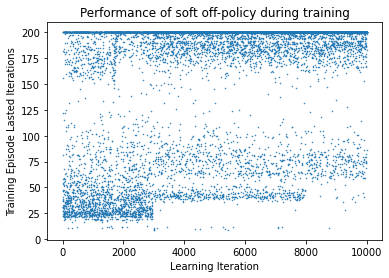

In [200]:
import matplotlib.pyplot as plt
plt.plot(T_history, '.', markersize=1)
plt.title("Performance of soft off-policy during training")
plt.xlabel("Learning Iteration")
plt.ylabel("Training Episode Lasted Iterations")

In [202]:
for i in range(10):
    data = list(test_cart_pole(lambda obs: pi[obs2state(obs)], print_iter=False))
    iters = len(data)
    print(f"Testing iter {i}, lasted {iters} iterations")
    # if iters < 200:
    #     for i in data:
    #         print(i, end="")
    #         print(f"Q={Q[obs2state(i[1])]}")

Testing iter 0, lasted 200 iterations
Testing iter 1, lasted 187 iterations
Testing iter 2, lasted 197 iterations
Testing iter 3, lasted 200 iterations
Testing iter 4, lasted 188 iterations
Testing iter 5, lasted 200 iterations
Testing iter 6, lasted 199 iterations
Testing iter 7, lasted 200 iterations
Testing iter 8, lasted 200 iterations
Testing iter 9, lasted 200 iterations


> (Optional)
> 
> Explore the OpenAI gyms that are available, and find a discrete environment, and employ your MC control algorithm for it.


> The goal of this assignment is to ensure you understand the underlying algorithms of MC control, as distinct from DynProg. Start early and ask questions. The goal is to prepare you for the test: the test will stress the concepts. The assignment will generate working knowledge for these concepts, complementing and reinforcing your theoretical/conceptual knowledge.
> 
> Submit the code via a file called assignment.py; if you choose to do the optional work, submit it as optional.py.
> 
> Answer the exercise questions above, and show logs from your code showing how long your solver can keep the pole balanced; the goal is clearly to balance it indefinitely (say for 10,000 steps). This should be submitted as a pdf: assignment.pdf. If you do optional, submit the logs as optional.pdf. For any logs, you must be very clear and explain what you are showing, and what it means. Just submitting a raw log with no comments or explanation is insufficient and can not be properly graded.
> 
> This assignment can be done within a week, however, I have given you a penalty-free extension as noted. No requests for extensions will be entertained.